In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cv-median542022/df_cv median.csv
/kaggle/input/sorted-by-mean-sept/df mean shap cv10_sept.csv
/kaggle/input/cv-mean2552022/df mean shap cv10.csv
/kaggle/input/cv-median2552022/df_cv median.csv
/kaggle/input/sorted-by-median-sept/df_cv median.csv
/kaggle/input/cv-mean452022/df mean shap cv10_sept.csv


In [2]:
mean_sort = pd.read_csv(r'../input/cv-mean2552022/df mean shap cv10.csv', sep=';')
median_sort = pd.read_csv(r'../input/cv-median2552022/df_cv median.csv', sep=';')

In [3]:
print(mean_sort)

    Unnamed: 0           variable  variable importance
0           15    population_3000             2.481984
1           36  road_class_3_3000             1.765433
2           83          trafBuf25             1.141086
3            1     nightlight_450             1.057956
4           14    population_1000             1.019110
..         ...                ...                  ...
83          19    road_class_1_25             0.009344
84          24    road_class_1_50             0.005237
85           7       industry_100             0.002623
86          13        industry_50             0.001308
87           8        industry_25             0.001122

[88 rows x 3 columns]


In [4]:
mean_sort['rank sorted by mean shap'] = range(1, len(mean_sort)+1,1)

In [5]:
#examine
print(median_sort)

    Unnamed: 0               name  rank  rank_2  rank_3  rank_4  rank_5  \
0            0    population_3000     1       1       2       1       1   
1            2  road_class_3_3000     3       2       1       4       5   
2            1          trafBuf25     2       3       3       3       4   
3            3    population_1000     4       7       4       2       3   
4            4     nightlight_450     5       4      19       6       2   
..         ...                ...   ...     ...     ...     ...     ...   
83          82    road_class_1_25    83      88      84      88      85   
84          84    road_class_1_50    85      85      81      85      84   
85          86       industry_100    87      83      86      84      86   
86          85        industry_50    86      87      87      87      87   
87          87        industry_25    88      86      88      86      88   

    rank_6  rank_7  rank_8  rank_9  rank_10  median  
0        1       2       2       1        2  

In [6]:
#remove unnecessary columns
median_sort = median_sort.drop(['Unnamed: 0'], axis=1)
mean_sort = mean_sort.drop(['Unnamed: 0'], axis=1)

In [7]:
#rename columns
median_sort = median_sort.rename(columns={'rank':'rank sorted by median', 'name':'variable'})

In [8]:
#Examine
print(median_sort)

             variable  rank sorted by median  rank_2  rank_3  rank_4  rank_5  \
0     population_3000                      1       1       2       1       1   
1   road_class_3_3000                      3       2       1       4       5   
2           trafBuf25                      2       3       3       3       4   
3     population_1000                      4       7       4       2       3   
4      nightlight_450                      5       4      19       6       2   
..                ...                    ...     ...     ...     ...     ...   
83    road_class_1_25                     83      88      84      88      85   
84    road_class_1_50                     85      85      81      85      84   
85       industry_100                     87      83      86      84      86   
86        industry_50                     86      87      87      87      87   
87        industry_25                     88      86      88      86      88   

    rank_6  rank_7  rank_8  rank_9  ran

In [9]:
print(mean_sort)

             variable  variable importance  rank sorted by mean shap
0     population_3000             2.481984                         1
1   road_class_3_3000             1.765433                         2
2           trafBuf25             1.141086                         3
3      nightlight_450             1.057956                         4
4     population_1000             1.019110                         5
..                ...                  ...                       ...
83    road_class_1_25             0.009344                        84
84    road_class_1_50             0.005237                        85
85       industry_100             0.002623                        86
86        industry_50             0.001308                        87
87        industry_25             0.001122                        88

[88 rows x 3 columns]


In [10]:
#rename column
mean_sort = mean_sort.rename(columns={'rank':'rank sorted by mean shap'})

In [11]:
#examine
print(mean_sort)

             variable  variable importance  rank sorted by mean shap
0     population_3000             2.481984                         1
1   road_class_3_3000             1.765433                         2
2           trafBuf25             1.141086                         3
3      nightlight_450             1.057956                         4
4     population_1000             1.019110                         5
..                ...                  ...                       ...
83    road_class_1_25             0.009344                        84
84    road_class_1_50             0.005237                        85
85       industry_100             0.002623                        86
86        industry_50             0.001308                        87
87        industry_25             0.001122                        88

[88 rows x 3 columns]


In [12]:
#merge datasets
df_new = pd.merge(mean_sort,median_sort,on='variable',how='outer')

In [13]:
#examine
df_new.head(24)

,variable,variable importance,rank sorted by mean shap,rank sorted by median,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,median
0,population_3000,2.481984,1,1,1,2,1,1,1,2,2,1,2,1.0
1,road_class_3_3000,1.765433,2,3,2,1,4,5,2,1,3,7,1,2.5
2,trafBuf25,1.141086,3,2,3,3,3,4,5,5,5,6,3,3.5
3,nightlight_450,1.057956,4,5,4,19,6,2,10,3,1,3,5,4.5
4,population_1000,1.019110,5,4,7,4,2,3,3,4,4,5,7,4.0
5,nightlight_3150,0.622053,6,7,15,7,5,8,4,14,6,20,4,7.0
6,trafBuf50,0.586208,7,9,5,5,16,20,8,6,7,2,10,7.5
7,BldDen100,0.508724,8,8,12,6,7,7,17,11,14,10,6,9.0
8,road_class_3_300,0.463598,9,11,8,17,8,22,6,10,9,4,8,8.5
9,road_class_2_25,0.370218,10,12,9,8,14,16,7,18,36,9,13,12.5


In [14]:
#to list 
cols = df_new.columns.tolist()

In [15]:
cols[0]

'variable'

In [16]:
cols = cols[1:] + cols[:1]

In [17]:
cols

['variable importance',
 'rank sorted by mean shap',
 'rank sorted by median',
 'rank_2',
 'rank_3',
 'rank_4',
 'rank_5',
 'rank_6',
 'rank_7',
 'rank_8',
 'rank_9',
 'rank_10',
 'median',
 'variable']

In [18]:
df_new = df_new[cols]

In [19]:
df_new.head(30)

,variable importance,rank sorted by mean shap,rank sorted by median,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,median,variable
0,2.481984,1,1,1,2,1,1,1,2,2,1,2,1.0,population_3000
1,1.765433,2,3,2,1,4,5,2,1,3,7,1,2.5,road_class_3_3000
2,1.141086,3,2,3,3,3,4,5,5,5,6,3,3.5,trafBuf25
3,1.057956,4,5,4,19,6,2,10,3,1,3,5,4.5,nightlight_450
4,1.019110,5,4,7,4,2,3,3,4,4,5,7,4.0,population_1000
5,0.622053,6,7,15,7,5,8,4,14,6,20,4,7.0,nightlight_3150
6,0.586208,7,9,5,5,16,20,8,6,7,2,10,7.5,trafBuf50
7,0.508724,8,8,12,6,7,7,17,11,14,10,6,9.0,BldDen100
8,0.463598,9,11,8,17,8,22,6,10,9,4,8,8.5,road_class_3_300
9,0.370218,10,12,9,8,14,16,7,18,36,9,13,12.5,road_class_2_25


In [20]:
#rename columns
df_new = df_new.rename(columns={'rank sorted by median': 'rank sorted by median (CV=10)', 'rank sorted by mean shap': 'rank sorted by mean shap (CV=10)'})

In [21]:
#assign to variables
x = df_new['rank sorted by mean shap (CV=10)']
y = df_new['rank sorted by median (CV=10)']

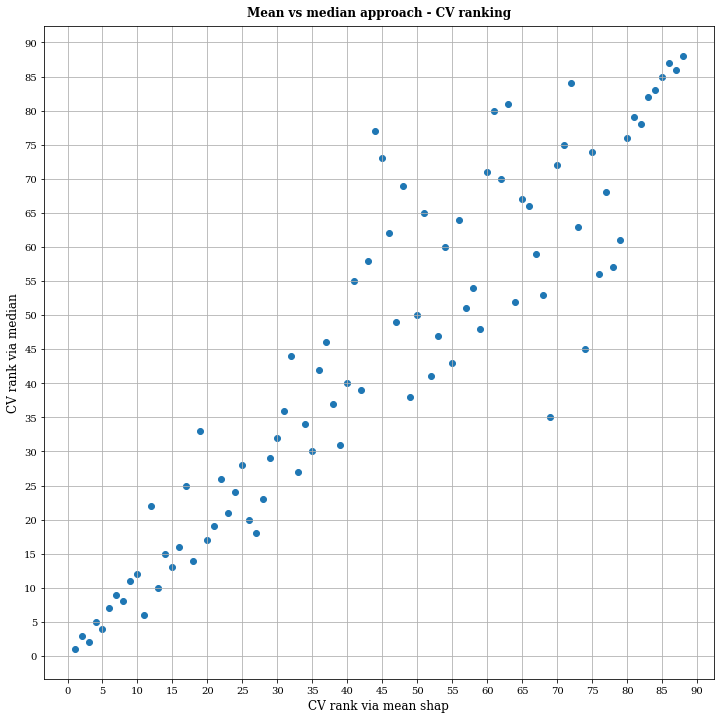

In [22]:
#visualize and safe figure
import matplotlib.pyplot as plt

#define font
plt.rcParams["font.family"] = "serif"

plt.figure(figsize= (12,12))
plt.title("Mean vs median approach - CV ranking", fontweight='bold', pad=10)
plt.xlabel("CV rank via mean shap", fontsize=12)
plt.xticks(np.arange(min(x)-1, max(x)+5, 5))
plt.ylabel("CV rank via median", fontsize=12)
plt.yticks(np.arange(min(x)-1, max(x)+5, 5))
plt.grid()
plt.scatter(x, y)
plt.savefig('medianXmean_sept.jpg',bbox_inches='tight')